# CS5242 Project - Garbage Classification (Shanghai) - Group 27
For Neural Networks and Deep Learning (CS 5242) AY 2022-2023 Sem 1.
* Team member: Li Guoshen (A0237348X), An Yuhong (A0254379R), He Wenbin (A0237325H)

In [ ]:
import random
import numpy as np
import torch
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [ ]:
import os
import sys
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/CS5242 project')
sys.path.append('/content/gdrive/My Drive/CS5242 project/Utils')

Mounted at /content/gdrive


In [ ]:
type_numbers = 2
image_number_crawler = 10
resplit_dataset_flag = False
get_labels_flag = False
query_trash_type_flag = False
data_cleaning_flag = False
Flickr_crawler_flag = False
over_sampling_flag = False

## Step 1: Get item labels

* Since we want to follow the rules of Shanghai Garbage Classification system, we need to get the Chinese labels for different items.
* We first get the summary of Chinese names of junk items online.
  * https://zh.m.wikipedia.org/zh-sg/%E4%B8%8A%E6%B5%B7%E5%B8%82%E7%94%9F%E6%B4%BB%E5%9E%83%E5%9C%BE%E5%88%86%E7%B1%BB%E5%88%B6%E5%BA%A6
  * http://www.gjw123.com/tools-lajifenlei
  * etc.
* Then get the labels and save them in `labels.txt`.

In [ ]:
labels_save_path = './Labels'

In [ ]:
if get_labels_flag:
    !python ./Utils/get_labels.py

## Step 2: Query garbage types on the Shanghai Garbage Classification platform according to labels

* Since we want to follow the rules of Shanghai Garbage Classification System (and some labels might not be included in this system), we query the specific garbage types in Chinese.
  * URL: https://trash.lhsr.cn/sites/feiguan/trashTypes_3/TrashQuery.aspx
* There are four main types included in Shanghai Garbage Classification System: `Recyclable (可回收)`， `Harmful waste (有害垃圾)`, `Dry garbage (干垃圾)`, `Wet garbage (湿垃圾)`. (Translated by Baidu)
* Based on Chinses results, we need to use Baidu Translate API to get their English names. And save the final results into `labels.csv` in the format of (garbage_type, label).
    * Baidu API can apply at https://api.fanyi.baidu.com

In [ ]:
from bs4 import BeautifulSoup
import time
import http.client
import hashlib
import urllib
import random
import json

In [ ]:
if query_trash_type_flag:
    !python ./Utils/query_trash_type.py

## Step 3: Image Data Collection Using Off-the-Shelf API

Many web plartforms provide API for developer use. For example, we can use Flickr API to collect image data.

Flickr is a well-known picture sharing platform, with a helpful API to facilitate developers to collect high quality image data. For this project, you may consider using the search query as the ground-truth label and collect relevant images to train a classifier for certain task. 

To use Flickr API, you need to first set up an account and apply for *authentification key* from [this link](https://www.flickr.com/services/api/misc.api_keys.html). 

Run the following cell after modifying the *key* and *secret* with your own authentification:

In [ ]:
key = 'ada677c758306224de32e21219a644f5'
secret = 'f85284182c7b520b'

### General Packages for data scraping and management

The code cell below imports some generally useful tools for data crawling and management. For example:
- The *requests* package allows you to send HTTP requests using Python, i.e., you can use *requests* to download files given the file link;
- The *pandas* help you store relevant information (file directory, label, etc.) in a csv or excel document;
- The *tqdm* visualizes the progress and estimated remaining time of your data processing.

Now, run the following cell by hitting `SHIFT+ENTER` to import these packages.

### 3.1 Install Python Flickr API

Now import the python interface to Flickr API:

### 3.2 Acquire Image Links

*Flickrapi* provides a *walk* function, which can walk through all photos in a set specified by a search result

### 3.3 Download files using acquired links

Till now we have collected the image urls. Now we will use the *request* package to download the image files.

In [ ]:
import requests
import pandas as pd
from tqdm import tqdm

In [ ]:
#uncomment if you have not yet installed flickrapi
!pip3 install flickrapi
from flickrapi import FlickrAPI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 54 kB 3.1 MB/s 


In [ ]:
image_crawler_save_path = './Image_crawler'
if not os.path.exists(image_crawler_save_path):
    os.makedirs(image_crawler_save_path)
    print("We create a new folder {}".format(image_crawler_save_path))

In [ ]:
labels_path = os.path.join(labels_save_path, 'labels.csv')
if not os.path.exists(labels_path):
    print("Path didn't exist!")
else:
    labels_pd = pd.read_csv(labels_path, names=['trash_type', 'item_type'])

print(labels_pd)

       trash_type    item_type
0      Recyclable       Carton
1      Recyclable    Newspaper
2      Recyclable     Envelope
3      Recyclable       Billet
4      Recyclable        Sheet
5      Recyclable       Pillow
6      Recyclable         Belt
7      Recyclable         Wire
8      Recyclable         Plug
9      Recyclable     Woodwork
10  Harmful waste      Battery
11  Harmful waste    Herbicide
12  Harmful waste        Paint
13  Harmful waste   Medicament
14  Harmful waste  Insecticide
15    Wet garbage         Rice
16    Wet garbage        Bread
17    Wet garbage         Duck
18    Wet garbage       Mutton
19    Wet garbage        Bacon
20    Wet garbage     Eggshell
21    Wet garbage        Scale
22    Wet garbage       Shrimp
23    Wet garbage        Squid
24    Wet garbage   Vegetables
25    Wet garbage     Truffle 
26    Wet garbage     Fishbone
27    Wet garbage        Candy
28    Wet garbage        Flour
29    Wet garbage        Petal
30    Dry garbage       Napkin
31    Dr

In [ ]:
import shutil
flickr_scrape_save_path = os.path.join(image_crawler_save_path, 'Flickr_scrape')

In [ ]:
if Flickr_crawler_flag:
    !python ./Utils/Flickr_crawler.py

In [ ]:
labels_dict_path = os.path.join(labels_save_path, 'labels_dict.npy')
if not os.path.exists(labels_dict_path):
    print("{} didn't exist!".format(labels_dict_path))
else:
    labels_dict = np.load(labels_dict_path, allow_pickle=True).item()

print(labels_dict)

{'Newspaper': 'Recyclable_Newspaper', 'Pillow': 'Recyclable_Pillow', 'Battery': 'Harmful waste_Battery', 'Vegetables': 'Wet garbage_Vegetables', 'Pen': 'Dry garbage_Pen'}


### 3.4 Visualize Collected Image Data in Notebook

You can visualize sample images in a jupyter notebook

In [ ]:
import ipywidgets as widgets
from glob import glob
from matplotlib import pyplot as plt
import cv2

In [ ]:
def plot_samples(category, flickr_scrape_save_path):
    paths = sorted(glob(f'./{flickr_scrape_save_path}/{category}/*.*'))
    paths = np.random.choice(paths, 4, replace=False)

    plt.figure(figsize=(12,12))
    for i in range(4):
        image = cv2.imread(paths[i])[...,[2,1,0]]
        image = cv2.resize(image, (512,512), interpolation=cv2.INTER_LINEAR)
        plt.subplot(1, 4, i+1)
        plt.imshow(image)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


all_categories = labels_dict.values()
widgets.interact_manual.opts['manual_name'] = 'Show samples'
im = widgets.interact_manual(lambda category: plot_samples(category, flickr_scrape_save_path), category=all_categories)

interactive(children=(Dropdown(description='category', options=('Recyclable_Newspaper', 'Recyclable_Pillow', '…

### 3.5 Data Exploration, Exploitation, and Analysis

Upon acquiring your data set, you should do some statistical analysis to better understand some data property. This can be helpful to data pre-processing and can guide your next move. For example, you can visualze the distribution of image size and ratio, which can help you later design shapes of model architecture as well as find and remove images with extreme ratios. You are encouraged to come up with more strategies to explore/exploit/analyze your own acquired data.

In [ ]:
import seaborn as sns

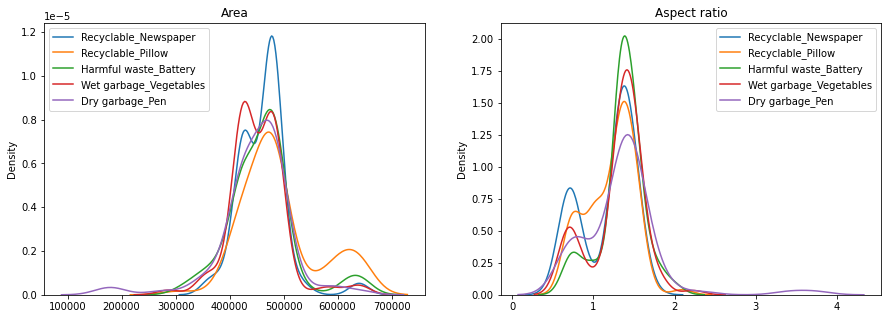

In [ ]:
def get_size(path):
    image = cv2.imread(path)
    shape = image.shape[:2]

    return shape[1]*shape[0], shape[1]/shape[0]
  

all_categories = labels_dict.values()
sizes = []
ratios = []
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5))
for i, species in enumerate(all_categories):
    paths = sorted(glob(f'{flickr_scrape_save_path}/{species}/*.*'))
    output = np.array([get_size(path) for path in paths])
      
    sizes.append(output[:,0])
    ratios.append(output[:,1])

    sns.kdeplot(output[:,0], label = species, ax=ax0)
    sns.kdeplot(output[:,1], label = species, ax=ax1)

ax0.set_title('Area')
ax1.set_title('Aspect ratio')
ax0.legend()
ax1.legend()
plt.show()

## Step 4: Data cleaning

In [ ]:
from torch.utils.data import Dataset
from PIL import Image
from sklearn.cluster import KMeans
from imutils import build_montages
import matplotlib.image as imgplt
from google.colab.patches import cv2_imshow
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms
from torchvision.models import ResNet50_Weights
from skimage.metrics import structural_similarity as ssim

In [ ]:
trash_path = "./Trash/"

In [ ]:
if data_cleaning_flag:
    !python ./Utils/data_cleaning.py

## Step 5: Dataset Generation

### 5.1 Load all images and split them into train/test folder

In [ ]:
def makedir(new_dir):
    if not os.path.exists(new_dir):
        os.makedirs(new_dir)
        print("We create a new folder {}".format(new_dir))


def train_test_dataset_split(flickr_scrape_save_path, dataset_save_path, train_dataset_save_path, test_dataset_save_path):
    try:
        shutil.rmtree(train_dataset_save_path)
        print(f"Removed past data in {train_dataset_save_path}")
    except OSError as e:
        print("Error: %s : %s" % (train_dataset_save_path, e.strerror))
    
    try:
        shutil.rmtree(test_dataset_save_path)
        print(f"Removed past data in {test_dataset_save_path}")
    except OSError as e:
        print("Error: %s : %s" % (test_dataset_save_path, e.strerror))

    for root, dirs, files in os.walk(flickr_scrape_save_path):
        for sub_dir in dirs:

            imgs = os.listdir(os.path.join(root, sub_dir))
            imgs = list(filter(lambda x: x.endswith('.jpg'), imgs))
            random.shuffle(imgs)
            img_count = len(imgs)

            train_point = int(img_count * train_pct)

            for i in range(img_count):
                if i < train_point:
                    out_dir = os.path.join(train_dataset_save_path, sub_dir)
                else:
                    out_dir = os.path.join(test_dataset_save_path, sub_dir)

                makedir(out_dir)

                source_path = os.path.join(flickr_scrape_save_path, sub_dir, imgs[i])
                target_path = os.path.join(out_dir, imgs[i])

                shutil.copy(source_path, target_path)

            print('Class:{}, train:{}, test:{}'.format(sub_dir, train_point, img_count-train_point))


dataset_save_path = "./Dataset/"
makedir(dataset_save_path)
train_dataset_save_path = os.path.join(dataset_save_path, "train")
test_dataset_save_path = os.path.join(dataset_save_path, "test")
train_pct = 0.9
test_pct = 0.1

if resplit_dataset_flag:
    print('Start spliting train/test dataset')
    train_test_dataset_split(flickr_scrape_save_path, dataset_save_path, train_dataset_save_path, test_dataset_save_path)

#### Over Sampling

In [ ]:
!pip3 install -U geometric-smote

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gsmote import GeometricSMOTE
from sklearn.preprocessing import LabelEncoder

In [ ]:
def images_df(dataset_save_path):
    all_images = []
    all_images_labels = []
    flag = True
    for root, dirs, files in os.walk(dataset_save_path):
        for label_dir in dirs:
            imgs = os.listdir(os.path.join(root, label_dir))
            imgs = list(filter(lambda x: x.endswith('.jpg'), imgs))
            for img_name in imgs:
                image = Image.open(os.path.join(root, label_dir, img_name))
                image = np.array(image.convert("RGBA"))
                image = image / 255.0
                image = cv2.resize(image, (100, 100), interpolation=cv2.INTER_LINEAR)
                if flag:
                    # print(image.shape)
                    # plt.imshow(image)
                    flag = False
                image = image.reshape(-1,)
                all_images.append(image)
                all_images_labels.append(os.path.join(root, label_dir))
    
    X = pd.DataFrame(all_images)
    X = X.add_prefix('X')
    y = pd.DataFrame(all_images_labels, columns=['label'])
    y['label'] = y['label'].astype('category')
    labelencoder = LabelEncoder()
    y['label'] = labelencoder.fit_transform(y['label'])

    return X, y, labelencoder

In [ ]:
if over_sampling_flag:
    _, y_oversampling, _ = images_df(train_dataset_save_path)
    y_oversampling.groupby('label')['label'].count()

In [ ]:
if over_sampling_flag:
    !python ./Utils/over_sampling.py

In [ ]:
_, y_oversampling_after, _ = images_df(train_dataset_save_path)
y_oversampling_after.groupby('label')['label'].count()

label
0    81
1    80
2    81
3    81
4    81
Name: label, dtype: int64

### 5.2 Calculate std and mean value for each channel

In that example, they are using the mean and stddev of ImageNet, but if you look at their MNIST examples, the mean and stddev are 1-dimensional (since the inputs are greyscale-- no RGB channels).

Whether or not to use ImageNet's mean and stddev depends on your data. Assuming your data are ordinary photos of "natural scenes"† (people, buildings, animals, varied lighting/angles/backgrounds, etc.), and assuming your dataset is biased in the same way ImageNet is (in terms of class balance), then it's ok to normalize with ImageNet's scene statistics. If the photos are "special" somehow (color filtered, contrast adjusted, uncommon lighting, etc.) or an "un-natural subject" (medical images, satellite imagery, hand drawings, etc.) then I would recommend correctly normalizing your dataset before model training!*
https://stackoverflow.com/questions/58151507/why-pytorch-officially-use-mean-0-485-0-456-0-406-and-std-0-229-0-224-0-2

In [ ]:
from torchvision import datasets
import torch.optim as optim
from torch.utils.data import DataLoader

In [ ]:
def calculate_std_mean_RGB(train_dataset_save_path):
    train_dataset = datasets.ImageFolder(root=train_dataset_save_path, transform=transforms.ToTensor())
    train_dataset_loader = DataLoader(train_dataset)

    N_CHANNELS = 3
    print('==> Computing mean and std..')
    mean = torch.zeros(N_CHANNELS)
    std = torch.zeros(N_CHANNELS)
    for inputs, _labels in tqdm(train_dataset_loader):
        for i in range(N_CHANNELS):
            mean[i] += inputs[:,i,:,:].mean()
            std[i] += inputs[:,i,:,:].std()
    mean.div_(len(train_dataset_loader.dataset))
    std.div_(len(train_dataset_loader.dataset))
    print(mean, std)

    return mean, std

mean_RGB, std_RGB = calculate_std_mean_RGB(train_dataset_save_path)

==> Computing mean and std..


100%|██████████| 404/404 [00:08<00:00, 48.50it/s]

tensor([0.4854, 0.4452, 0.3982]) tensor([0.2428, 0.2363, 0.2319])


### 5.3 Data preprocessing, including data resize, data enhancement (image flipping and other operations), normalization, and conversion to tensor

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
input_size = 128
crop_size = 112
batch_size = 20

In [ ]:
if resplit_dataset_flag:
    image_transforms = {
        'train': transforms.Compose([
            transforms.Resize(size=input_size),
            transforms.RandomRotation(degrees=15),
            transforms.RandomHorizontalFlip(),
            # transforms.RandomResizedCrop(size=crop_size, scale=(0.8, 1.0)),
            transforms.CenterCrop(size=crop_size),
            transforms.ToTensor(),
            transforms.Normalize(mean_RGB.tolist(), std_RGB.tolist())
        ]),
        'test': transforms.Compose([
            transforms.Resize(size=input_size),
            transforms.CenterCrop(size=crop_size),
            transforms.ToTensor(),
            transforms.Normalize(mean_RGB.tolist(), std_RGB.tolist())
        ])
    }


    #load image data
    data = {
        'train': datasets.ImageFolder(root=train_dataset_save_path, transform=image_transforms['train']),
        'test': datasets.ImageFolder(root=test_dataset_save_path, transform=image_transforms['test'])
    }
    
    
    train_data_size = len(data['train'])
    test_data_size = len(data['test'])
    
    train_loader = DataLoader(data['train'], batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(data['test'], batch_size=batch_size, shuffle=True)

    classes = data['train'].class_to_idx
    classes_num = len(data['train'].class_to_idx)

    torch.save(train_loader, dataset_save_path + 'train_loader.pt')
    torch.save(test_loader, dataset_save_path + 'test_loader.pt')
    torch.save(classes, dataset_save_path + 'classes.pt')
    torch.save(image_transforms, dataset_save_path + 'transform.pt')

### 5.4 Load train/test dataset

In [ ]:
train_loader = torch.load(dataset_save_path + 'train_loader.pt')
test_loader = torch.load(dataset_save_path + 'test_loader.pt')
classes = torch.load(dataset_save_path + 'classes.pt')
image_transforms = torch.load(dataset_save_path + 'transform.pt')

classes_num = len(classes)
train_data_size = len(train_loader.dataset)
test_data_size = len(test_loader.dataset)

In [ ]:
print(classes_num) # number of classes

5


In [ ]:
print(classes) # class names

{'Dry garbage_Pen': 0, 'Harmful waste_Battery': 1, 'Recyclable_Newspaper': 2, 'Recyclable_Pillow': 3, 'Wet garbage_Vegetables': 4}


In [ ]:
print(train_data_size) # overall number of train samples, or len(train_loader.datasets)

404


In [ ]:
print(len(train_loader)) # number of batches

21


### 5.5 Define general function and parameters

In [ ]:
from torchsummary import summary
from torchvision import models
import copy
import gc
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
loss_func = nn.CrossEntropyLoss()

In [ ]:
!pip3 install torchviz
from torchviz import make_dot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=79da222ca9e7ffc1cca2b97bbad385a73847ca63ab222d9056b67558bdcdd29c
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [ ]:
try:
    shutil.rmtree('./Models')
    print(f"Removed past scrape in ./Models")
except OSError as e:
    print("Error: %s : %s" % ('./Models', e.strerror))

Removed past scrape in ./Models


In [ ]:
try:
    shutil.rmtree('./Figure/Models')
    print(f"Removed past scrape in ./Figure/Models")
except OSError as e:
    print("Error: %s : %s" % ('./Figure/Models', e.strerror))

Removed past scrape in ./Figure/Models


In [ ]:
try:
    shutil.rmtree('./Presentation/modelStructure/')
    print(f"Removed past scrape in ./Presentation/modelStructure/")
except OSError as e:
    print("Error: %s : %s" % ('./Presentation/modelStructure/', e.strerror))

Error: ./Presentation/modelStructure/ : No such file or directory


In [ ]:
from general_function import weight_initialization, train_and_test, history_save, result_figure_save, weight_plot, model_structure_plot, display_num_param

## Step 6: MLP

In [ ]:
hidden_size = 128
fc_inputs = 3*crop_size**2
num_epochs = 20

### 6.1 Multi-layer with nonlinear activation

In [ ]:
model_name = 'MLP/6_1'

MLP_6_1 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(fc_inputs, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, classes_num),
)
MLP_6_1 = MLP_6_1.to(device)

optimizer = optim.Adam(MLP_6_1.parameters())

# summary(MLP_6_1, (fc_inputs,))
display_num_param(MLP_6_1)

There are 4834181 (4.83 million) parameters in this neural network


We create new directory ./Figure/Models/MLP/6_1


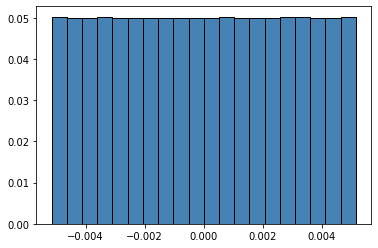

In [ ]:
weight_plot(MLP_6_1, model_name)

We create new directory ./Presentation/modelStructure/MLP


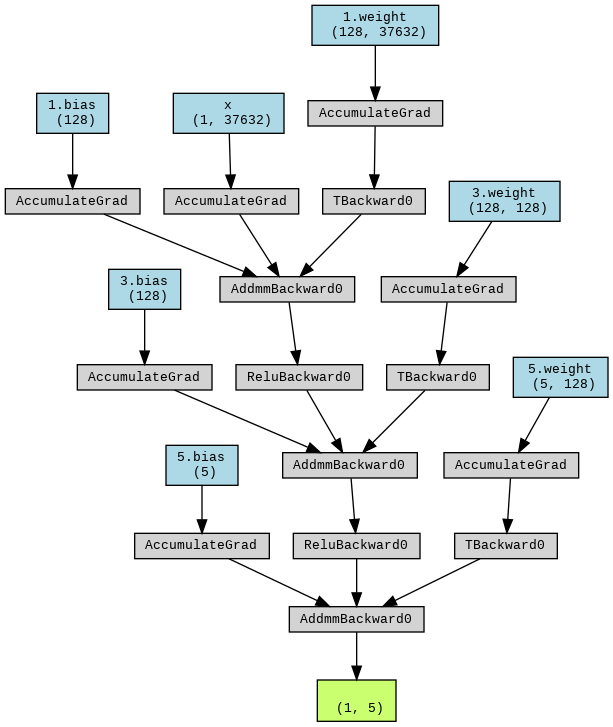

In [ ]:
model_structure_plot(MLP_6_1, model_name, crop_size=crop_size)

We create new directory ./Models/MLP/6_1
Epoch: 1/20
Epoch: 001, Training: Loss: 3.6994, Accuracy: 26.7327%, 
		Test: Loss: 2.8087, Accuracy: 28.2609%, 
		Time: 28.0181s
Best Accuracy for test : 28.2609% at epoch 001, best loss: 2.8087

Epoch: 2/20
Counter 1 of 5 for determining early stopping
Epoch: 002, Training: Loss: 2.8959, Accuracy: 39.8515%, 
		Test: Loss: 4.2685, Accuracy: 23.9130%, 
		Time: 5.2789s
Best Accuracy for test : 28.2609% at epoch 001, best loss: 2.8087

Epoch: 3/20
Counter 2 of 5 for determining early stopping
Epoch: 003, Training: Loss: 2.2783, Accuracy: 50.9901%, 
		Test: Loss: 4.1003, Accuracy: 28.2609%, 
		Time: 5.3616s
Best Accuracy for test : 28.2609% at epoch 001, best loss: 2.8087

Epoch: 4/20
Epoch: 004, Training: Loss: 2.2495, Accuracy: 53.7129%, 
		Test: Loss: 3.1213, Accuracy: 30.4348%, 
		Time: 5.3150s
Best Accuracy for test : 30.4348% at epoch 004, best loss: 2.8087

Epoch: 5/20
Epoch: 005, Training: Loss: 2.0277, Accuracy: 52.2277%, 
		Test: Loss: 3.6

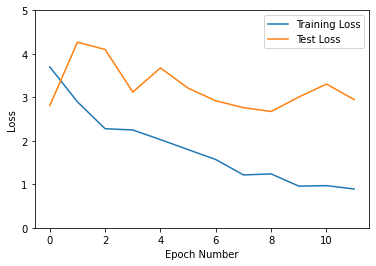

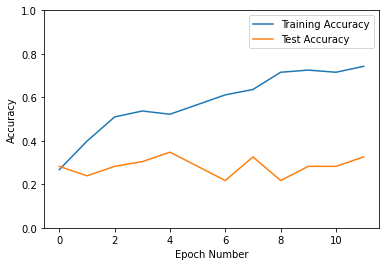

In [ ]:
trained_model, history = train_and_test(train_loader, test_loader, MLP_6_1, model_name, loss_func, optimizer, device, num_epochs)
history_save(history, model_name)

history = np.array(history)
result_figure_save(history, model_name)

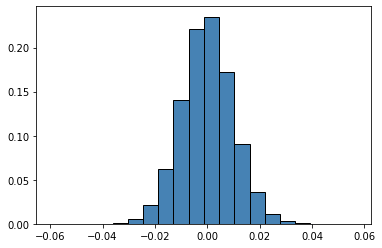

In [ ]:
weight_plot(MLP_6_1, model_name)

### 6.2 Multi-layer with nonlinear activation and kaiming weight initialization

In [ ]:
model_name = 'MLP/6_2'

MLP_6_2 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(fc_inputs, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, classes_num),
)
MLP_6_2 = MLP_6_2.to(device)

weight_initialization(MLP_6_2)

optimizer = optim.Adam(MLP_6_2.parameters())

# summary(MLP_6_2, (fc_inputs,))
display_num_param(MLP_6_2)

There are 4834181 (4.83 million) parameters in this neural network


We create new directory ./Figure/Models/MLP/6_2


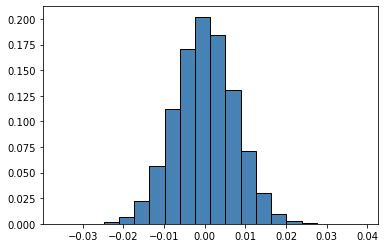

In [ ]:
weight_plot(MLP_6_2, model_name)

We create new directory ./Models/MLP/6_2
Epoch: 1/20
Epoch: 001, Training: Loss: 21.2177, Accuracy: 28.9604%, 
		Test: Loss: 14.8119, Accuracy: 36.9565%, 
		Time: 5.2575s
Best Accuracy for test : 36.9565% at epoch 001, best loss: 14.8119

Epoch: 2/20
Counter 1 of 5 for determining early stopping
Epoch: 002, Training: Loss: 16.2323, Accuracy: 35.6436%, 
		Test: Loss: 20.3104, Accuracy: 21.7391%, 
		Time: 5.1706s
Best Accuracy for test : 36.9565% at epoch 001, best loss: 14.8119

Epoch: 3/20
Counter 2 of 5 for determining early stopping
Epoch: 003, Training: Loss: 13.7157, Accuracy: 42.5743%, 
		Test: Loss: 18.9848, Accuracy: 36.9565%, 
		Time: 6.1302s
Best Accuracy for test : 36.9565% at epoch 001, best loss: 14.8119

Epoch: 4/20
Counter 3 of 5 for determining early stopping
Epoch: 004, Training: Loss: 12.6096, Accuracy: 50.2475%, 
		Test: Loss: 15.7489, Accuracy: 28.2609%, 
		Time: 7.7649s
Best Accuracy for test : 36.9565% at epoch 001, best loss: 14.8119

Epoch: 5/20
Counter 4 of 5 fo

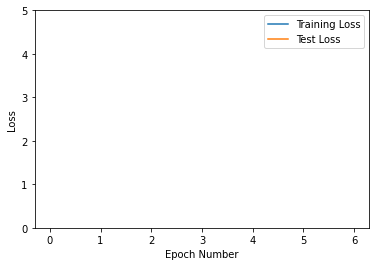

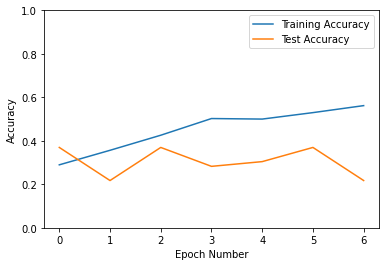

In [ ]:
trained_model, history = train_and_test(train_loader, test_loader, MLP_6_2, model_name, loss_func, optimizer, device, num_epochs)
history_save(history, model_name)

history = np.array(history)
result_figure_save(history, model_name)

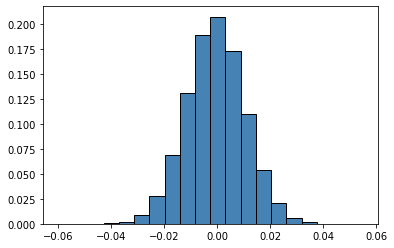

In [ ]:
weight_plot(trained_model, model_name)

### 6.3 Multi-layer with nonlinear activation, kaiming weight initialization, and weight decay

In [ ]:
model_name = 'MLP/6_3'

MLP_6_3 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(fc_inputs, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, classes_num),
)
MLP_6_3 = MLP_6_3.to(device)

weight_initialization(MLP_6_3)

optimizer = optim.Adam(MLP_6_3.parameters(), weight_decay=1e-2)

# summary(MLP_6_3, (fc_inputs,))
display_num_param(MLP_6_3)

There are 4834181 (4.83 million) parameters in this neural network


We create new directory ./Models/MLP/6_3
Epoch: 1/20
Epoch: 001, Training: Loss: 19.1956, Accuracy: 26.9802%, 
		Test: Loss: 28.6728, Accuracy: 26.0870%, 
		Time: 5.2587s
Best Accuracy for test : 26.0870% at epoch 001, best loss: 28.6728

Epoch: 2/20
Epoch: 002, Training: Loss: 19.5170, Accuracy: 37.1287%, 
		Test: Loss: 24.3205, Accuracy: 32.6087%, 
		Time: 5.2182s
Best Accuracy for test : 32.6087% at epoch 002, best loss: 24.3205

Epoch: 3/20
Counter 0 of 5 for determining early stopping. Test loss keeps decreasing
Epoch: 003, Training: Loss: 14.8150, Accuracy: 44.0594%, 
		Test: Loss: 16.6009, Accuracy: 23.9130%, 
		Time: 5.1746s
Best Accuracy for test : 32.6087% at epoch 002, best loss: 16.6009

Epoch: 4/20
Counter 0 of 5 for determining early stopping. Test loss keeps decreasing
Epoch: 004, Training: Loss: 10.5550, Accuracy: 50.4950%, 
		Test: Loss: 15.0497, Accuracy: 32.6087%, 
		Time: 5.2274s
Best Accuracy for test : 32.6087% at epoch 002, best loss: 15.0497

Epoch: 5/20
Counter

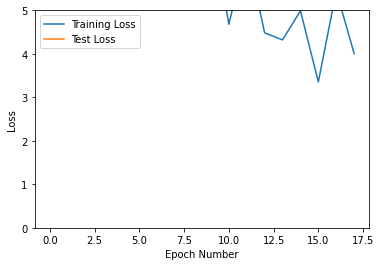

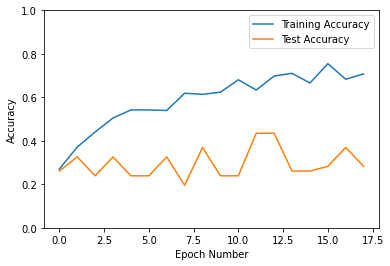

In [ ]:
trained_model, history = train_and_test(train_loader, test_loader, MLP_6_3, model_name, loss_func, optimizer, device, num_epochs)
history_save(history, model_name)

history = np.array(history)
result_figure_save(history, model_name)

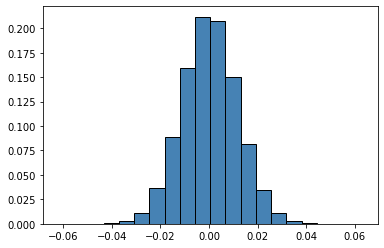

In [ ]:
weight_plot(trained_model, model_name)

### 6.4 Multi-layer with nonlinear activation, kaiming weight initialization, weight decay, batchnorm layer, and dropout layer. Using genetic algorithm to update weight instead of gradient descend to aovid gradient disappear.

In [ ]:
!pip3 install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 3.9 MB/s 


In [ ]:
import pygad.torchga as torchga
import pygad

In [ ]:
model_name = 'MLP/6_4'
hidden_size_GA = 64
# hidden_size_GA = hidden_size
MLP_6_4 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(fc_inputs, hidden_size_GA),
    nn.BatchNorm1d(hidden_size_GA),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(hidden_size_GA, hidden_size_GA),
    nn.BatchNorm1d(hidden_size_GA),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(hidden_size_GA, classes_num),
)
MLP_6_4 = MLP_6_4.to(device)

# summary(MLP_6_4, (fc_inputs,))
display_num_param(MLP_6_4)

There are 2413253 (2.41 million) parameters in this neural network


In [ ]:
def fitness_func(solution, sol_idx):
    global train_label_GA, train_input_GA, torch_ga, MLP_6_4, loss_func
    """
    - model:模型
    - solution: 也就是遗传算法群体中的个体
    - data: 数据
    """
    train_loss = 0.0

    inputs = train_input_GA.to(device)
    labels = train_label_GA.to(device)

    predictions = torchga.predict(model=MLP_6_4, solution=solution, data=inputs)
    train_loss += loss_func(predictions, labels).cpu().detach().numpy() * inputs.size(0)

    gc.collect()

    avg_train_loss = train_loss/len(labels)
    # 因为评估值是越大越好
    solution_fitness = 1.0 / (avg_train_loss + 0.00000001)

    return solution_fitness

def callback_generation(ga_instance):
    global test_label_GA, test_input_GA
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    test_loss = 0.0
    test_acc = 0.0
    
    with torch.no_grad():
        MLP_6_4.eval()

        inputs = test_input_GA.to(device)
        labels = test_label_GA.to(device)

        predictions = pygad.torchga.predict(model=MLP_6_4, solution=solution, data=inputs)
        test_loss += loss_func(predictions, labels).cpu().detach().numpy() * inputs.size(0)

        ret, predictions = torch.max(predictions.data, 1)
        correct_counts = predictions.eq(labels.data.view_as(predictions))
        acc = torch.mean(correct_counts.type(torch.FloatTensor))
        test_acc += acc.item() * inputs.size(0)

        gc.collect()

    avg_test_loss = test_loss/len(labels)
    avg_test_acc = test_acc/len(labels)

    print("Absolute Error on test dataset: {:.4f}".format(avg_test_loss))
    print("Accuracy on test dataset: {:.4f}%".format(avg_test_acc*100))
    print()
    MLP_6_4.train()

Generation = 1
Fitness    = 0.5654172995292952
Absolute Error on test dataset: 1.6356
Accuracy on test dataset: 15.0000%

Generation = 2
Fitness    = 0.5654172995292952
Absolute Error on test dataset: 1.6356
Accuracy on test dataset: 15.0000%

Generation = 3
Fitness    = 0.5654172995292952
Absolute Error on test dataset: 1.6356
Accuracy on test dataset: 15.0000%

Generation = 4
Fitness    = 0.5654172995292952
Absolute Error on test dataset: 1.6356
Accuracy on test dataset: 15.0000%

Generation = 5
Fitness    = 0.5654172995292952
Absolute Error on test dataset: 1.6356
Accuracy on test dataset: 15.0000%

Generation = 6
Fitness    = 0.5654172995292952
Absolute Error on test dataset: 1.6356
Accuracy on test dataset: 15.0000%

Generation = 7
Fitness    = 0.5654172995292952
Absolute Error on test dataset: 1.6356
Accuracy on test dataset: 15.0000%

Generation = 8
Fitness    = 0.5654172995292952
Absolute Error on test dataset: 1.6356
Accuracy on test dataset: 15.0000%

Generation = 9
Fitness  

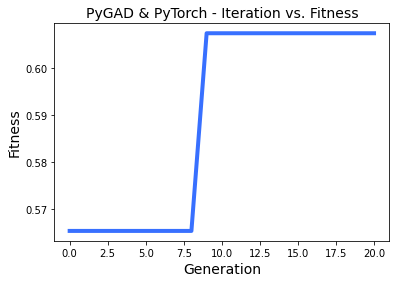

In [ ]:
for i, (inputs, labels) in enumerate(train_loader):
    train_label_GA = labels
    train_input_GA = inputs
    break
for i, (inputs, labels) in enumerate(test_loader):
    test_label_GA = labels
    test_input_GA = inputs
    break

# 在初始化种群时，实例化 pygad.torchga.TorchGA 
torch_ga = torchga.TorchGA(model=MLP_6_4, num_solutions=10)

num_generations = 20 if num_epochs>20 else num_epochs # 迭代次数
# num_generations = 5
num_parents_mating = 5 # 每次从父类中选择的个体进行交叉、和突变的数量
initial_population = torch_ga.population_weights # 初始化网络权重

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)

ga_instance.run()

ga_instance.plot_fitness(title="PyGAD & PyTorch - Iteration vs. Fitness", linewidth=4)

# 返回最优参数的详细信息
solution, solution_fitness, solution_idx = ga_instance.best_solution()
# print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
# print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

In [ ]:
# 基于最好的个体来进行预测
test_loss = 0.0
test_acc = 0.0

with torch.no_grad():
    MLP_6_4.eval()
    for i, (inputs, labels) in enumerate(test_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        predictions = pygad.torchga.predict(model=MLP_6_4, solution=solution, data=inputs)
        test_loss += loss_func(predictions, labels).cpu().detach().numpy() * inputs.size(0)

        ret, predictions = torch.max(predictions.data, 1)
        correct_counts = predictions.eq(labels.data.view_as(predictions))
        acc = torch.mean(correct_counts.type(torch.FloatTensor))
        test_acc += acc.item() * inputs.size(0)

avg_test_loss = test_loss/len(test_loader.dataset)
avg_test_acc = test_acc/len(test_loader.dataset)

print("Absolute Error on test dataset: {:.4f}".format(avg_test_loss))
print("Accuracy on test dataset: {:.4f}%".format(avg_test_acc*100))

Absolute Error on test dataset: 95.9205
Accuracy on test dataset: 21.7391%


### Summary

## Step 7: CNN

In [ ]:
hidden_size = 128
# num_epochs = 20

### 7.1 Single-layer CNN (One Conv2d)

In [ ]:
model_name = 'CNN/7_1'

CNN_7_1 = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=hidden_size, kernel_size=3, stride=1, padding=1),
    nn.ReLU(inplace=True),
    nn.AdaptiveAvgPool2d(1),
    nn.Flatten(),
    nn.Linear(128, classes_num),
)
CNN_7_1 = CNN_7_1.to(device)

weight_initialization(CNN_7_1)

optimizer = optim.Adam(CNN_7_1.parameters())

# summary(CNN_7_1, (3, crop_size, crop_size))
display_num_param(CNN_7_1)

There are 4229 (0.00 million) parameters in this neural network


We create new directory ./Models/CNN/7_1
Epoch: 1/20
Epoch: 001, Training: Loss: 1.7789, Accuracy: 22.5248%, 
		Test: Loss: 1.6035, Accuracy: 26.0870%, 
		Time: 12.5384s
Best Accuracy for test : 26.0870% at epoch 001, best loss: 1.6035

Epoch: 2/20
Epoch: 002, Training: Loss: 1.4917, Accuracy: 32.1782%, 
		Test: Loss: 1.5494, Accuracy: 28.2609%, 
		Time: 10.2708s
Best Accuracy for test : 28.2609% at epoch 002, best loss: 1.5494

Epoch: 3/20
Counter 0 of 5 for determining early stopping. Test loss keeps decreasing
Epoch: 003, Training: Loss: 1.4491, Accuracy: 39.3564%, 
		Test: Loss: 1.5259, Accuracy: 26.0870%, 
		Time: 8.8652s
Best Accuracy for test : 28.2609% at epoch 002, best loss: 1.5259

Epoch: 4/20
Epoch: 004, Training: Loss: 1.4234, Accuracy: 38.3663%, 
		Test: Loss: 1.5222, Accuracy: 32.6087%, 
		Time: 5.1917s
Best Accuracy for test : 32.6087% at epoch 004, best loss: 1.5222

Epoch: 5/20
Epoch: 005, Training: Loss: 1.4059, Accuracy: 36.3861%, 
		Test: Loss: 1.4875, Accuracy: 36

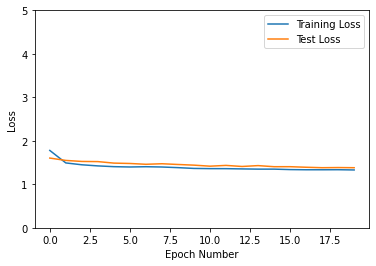

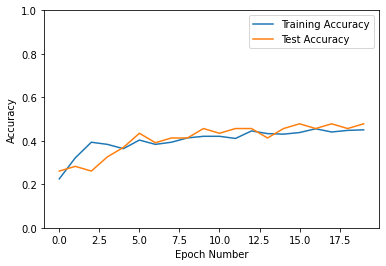

In [ ]:
trained_model, history = train_and_test(train_loader, test_loader, CNN_7_1, model_name, loss_func, optimizer, device, num_epochs)
history_save(history, model_name)

history = np.array(history)
result_figure_save(history, model_name)

### 7.2 Single-block CNN (Inception Structure)
传统的层叠式网络，基本上都是一个个卷积层的堆叠，每层只用一个尺寸的卷积核，例如VGG结构中使用了大量的3×3卷积层。事实上，同一层feature map可以分别使用多个不同尺寸的卷积核，以获得不同尺度的特征，再把这些特征结合起来，得到的特征往往比使用单一卷积核的要好。增加了宽度方向

In [ ]:
class GlobalAvgPool2d(nn.Module):
    def __init__(self):
        super(GlobalAvgPool2d, self).__init__()
    def forward(self, x):
        return nn.functional.avg_pool2d(x, kernel_size=x.size()[2:])

class Inception(nn.Module):
    def __init__(self,in_c,c1,c2,c3,c4):
        super(Inception,self).__init__()
        # -----------------------------------------
        self.p1 = nn.Sequential(
            nn.Conv2d(in_c,c1,kernel_size=1),
            nn.ReLU()
        )
        # -----------------------------------------
        self.p2 = nn.Sequential(
            nn.Conv2d(in_c,c2[0],kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(c2[0], c2[1], kernel_size=3,padding=1),
            nn.ReLU()
        )
        # -----------------------------------------
        self.p3 = nn.Sequential(
            nn.Conv2d(in_c, c3[0], kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(c3[0], c3[1], kernel_size=5,padding=2),
            nn.ReLU()
        )
        # -----------------------------------------
        self.p4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3,stride=1,padding=1),
            nn.Conv2d(in_c,c4,kernel_size=1),
            nn.ReLU()
        )

    def forward(self, x):
        p1 = self.p1(x)
        p2 = self.p2(x)
        p3 = self.p3(x)
        p4 = self.p4(x)
        return torch.cat((p1,p2,p3,p4),dim=1)

In [ ]:
model_name = 'CNN/7_2'

CNN_7_2 = nn.Sequential(
    nn.Conv2d(3,hidden_size,kernel_size=7,stride=2,padding=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2,padding=1),
    # -----------------------------------------
    Inception(hidden_size,64,(96,128),(16,32),32),
    nn.MaxPool2d(kernel_size=3,stride=2,padding=1),
    GlobalAvgPool2d(),
    # -----------------------------------------
    nn.Flatten(),
    nn.Linear(256, classes_num),
)
CNN_7_2 = CNN_7_2.to(device)

weight_initialization(CNN_7_2)

optimizer = optim.Adam(CNN_7_2.parameters())

# summary(CNN_7_2, (3, crop_size, crop_size))
display_num_param(CNN_7_2)

There are 170613 (0.17 million) parameters in this neural network


We create new directory ./Models/CNN/7_2
Epoch: 1/20
Epoch: 001, Training: Loss: 2.1046, Accuracy: 30.1980%, 
		Test: Loss: 1.7803, Accuracy: 15.2174%, 
		Time: 5.4872s
Best Accuracy for test : 15.2174% at epoch 001, best loss: 1.7803

Epoch: 2/20
Epoch: 002, Training: Loss: 1.4987, Accuracy: 33.4158%, 
		Test: Loss: 1.5369, Accuracy: 43.4783%, 
		Time: 5.4258s
Best Accuracy for test : 43.4783% at epoch 002, best loss: 1.5369

Epoch: 3/20
Epoch: 003, Training: Loss: 1.3357, Accuracy: 46.7822%, 
		Test: Loss: 1.4643, Accuracy: 45.6522%, 
		Time: 5.4345s
Best Accuracy for test : 45.6522% at epoch 003, best loss: 1.4643

Epoch: 4/20
Counter 0 of 5 for determining early stopping. Test loss keeps decreasing
Epoch: 004, Training: Loss: 1.3044, Accuracy: 42.0792%, 
		Test: Loss: 1.3934, Accuracy: 41.3043%, 
		Time: 5.4646s
Best Accuracy for test : 45.6522% at epoch 003, best loss: 1.3934

Epoch: 5/20
Counter 1 of 5 for determining early stopping
Epoch: 005, Training: Loss: 1.2667, Accuracy: 4

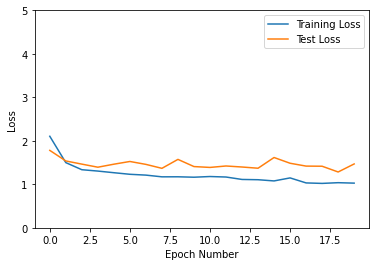

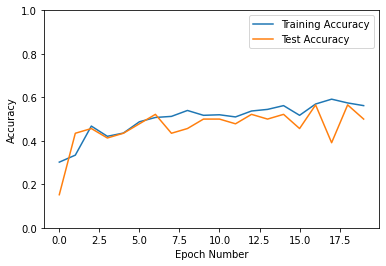

In [ ]:
trained_model, history = train_and_test(train_loader, test_loader, CNN_7_2, model_name, loss_func, optimizer, device, num_epochs)
history_save(history, model_name)

history = np.array(history)
result_figure_save(history, model_name)

### 7.3 Single-block CNN (Bottle Neck+Inception Structure)
发明GoogleNet的团队发现，如果仅仅引入多个尺寸的卷积核，会带来大量的额外的参数，为了解决这个问题，他们往Inception结构中加入了一些1×1的卷积核

In [ ]:
class Bottleneck_Inception(nn.Module):

    def __init__(self, block, in_channel, layer1_size, layer2_size, layer3_size, stride=1):
        super(Bottleneck_Inception, self).__init__()
        self.relu = nn.ReLU(inplace=True)

        # -----------------------------------------
        self.layer1 = nn.Conv2d(in_channels=in_channel, out_channels=layer1_size,
                               kernel_size=1, stride=1)  # squeeze channels
        self.bn1 = nn.BatchNorm2d(layer1_size)
        # -----------------------------------------
        self.layer2 = block
        self.bn2 = nn.BatchNorm2d(layer2_size)
        # -----------------------------------------
        self.layer3 = nn.Conv2d(in_channels=layer2_size, out_channels=layer3_size,
                               kernel_size=1, stride=1)  # unsqueeze channels
        self.bn3 = nn.BatchNorm2d(layer3_size)
        # -----------------------------------------

        self.layers_1 = nn.Sequential(
            self.layer1,
            self.bn1,
            self.relu,
            )
        self.layers_2 = nn.Sequential(
            self.layer2,
            self.bn2,
            self.relu,
            )
        self.layers_3 = nn.Sequential(
            self.layer3,
            self.bn3,
            self.relu
            )

    def forward(self, x):
        out = self.layers_1(x)
        # print(out.shape)
        out = self.layers_2(out)
        # print(out.shape)
        out = self.layers_3(out)
        # print(out.shape)
        return out

In [ ]:
model_name = 'CNN/7_3'

CNN_7_3 = nn.Sequential(
    nn.Conv2d(3,hidden_size,kernel_size=7,stride=2,padding=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2,padding=1),
    # -----------------------------------------
    Bottleneck_Inception(Inception(hidden_size,16,(24,32),(4,8),8), 128, 128, 64, 256),
    nn.MaxPool2d(kernel_size=3,stride=2,padding=1),
    GlobalAvgPool2d(),
    # -----------------------------------------
    nn.Flatten(),
    nn.Linear(256, classes_num),
)
CNN_7_3 = CNN_7_3.to(device)

weight_initialization(CNN_7_3)

optimizer = optim.Adam(CNN_7_3.parameters())

# summary(CNN_7_3, (3, crop_size, crop_size))
display_num_param(CNN_7_3)

There are 68737 (0.07 million) parameters in this neural network


We create new directory ./Models/CNN/7_3
Epoch: 1/20
Epoch: 001, Training: Loss: 1.5220, Accuracy: 34.9010%, 
		Test: Loss: 1.6030, Accuracy: 36.9565%, 
		Time: 5.8381s
Best Accuracy for test : 36.9565% at epoch 001, best loss: 1.6030

Epoch: 2/20
Epoch: 002, Training: Loss: 1.2751, Accuracy: 45.5446%, 
		Test: Loss: 1.3649, Accuracy: 45.6522%, 
		Time: 5.4727s
Best Accuracy for test : 45.6522% at epoch 002, best loss: 1.3649

Epoch: 3/20
Epoch: 003, Training: Loss: 1.2117, Accuracy: 49.5050%, 
		Test: Loss: 1.2163, Accuracy: 52.1739%, 
		Time: 5.4451s
Best Accuracy for test : 52.1739% at epoch 003, best loss: 1.2163

Epoch: 4/20
Counter 1 of 5 for determining early stopping
Epoch: 004, Training: Loss: 1.1503, Accuracy: 52.4752%, 
		Test: Loss: 1.4038, Accuracy: 52.1739%, 
		Time: 5.4053s
Best Accuracy for test : 52.1739% at epoch 003, best loss: 1.2163

Epoch: 5/20
Counter 1 of 5 for determining early stopping. Test loss keeps decreasing
Epoch: 005, Training: Loss: 1.1245, Accuracy: 5

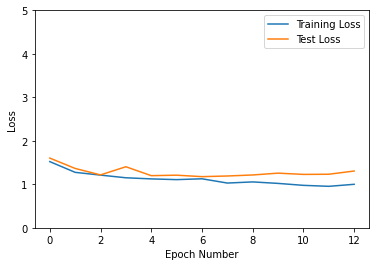

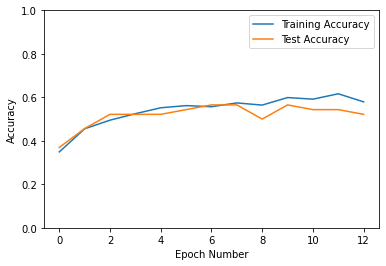

In [ ]:
trained_model, history = train_and_test(train_loader, test_loader, CNN_7_3, model_name, loss_func, optimizer, device, num_epochs)
history_save(history, model_name)

history = np.array(history)
result_figure_save(history, model_name)

### 7.4 Single-block CNN (Resnet)
传统的卷积层层叠网络会遇到一个问题，当层数加深时，网络的表现越来越差，很大程度上的原因是因为当层数加深时，梯度消散得越来越严重，以至于反向传播很难训练到浅层的网络。为了解决这个问题，Resnet使得梯度更容易地流动到浅层的网络当中去。往深度方向增加。

In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        # -----------------------------------------
        self.conv1 = nn.Conv2d(in_channels, out_channels, 3, stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        # -----------------------------------------
        self.conv2 = nn.Conv2d(out_channels, out_channels, 3, stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        # -----------------------------------------
        self.relu = nn.ReLU(inplace=True)

    def forward(self, input):
        identity = input
        x = self.conv1(input)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x += identity
        x = self.relu(x)
        return x

In [ ]:
model_name = 'CNN/7_4'

CNN_7_4 = nn.Sequential(
    nn.Conv2d(3,hidden_size,kernel_size=7,stride=2,padding=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2,padding=1),
    # -----------------------------------------
    ResidualBlock(128, 128),
    nn.MaxPool2d(kernel_size=3,stride=2,padding=1),
    GlobalAvgPool2d(),
    # -----------------------------------------
    nn.Flatten(),
    nn.Linear(128, classes_num),
)
CNN_7_4 = CNN_7_4.to(device)

weight_initialization(CNN_7_4)

optimizer = optim.Adam(CNN_7_4.parameters())

# summary(CNN_7_4, (3, crop_size, crop_size))
display_num_param(CNN_7_4)

There are 315013 (0.32 million) parameters in this neural network


We create new directory ./Models/CNN/7_4
Epoch: 1/20
Epoch: 001, Training: Loss: 1.9408, Accuracy: 35.1485%, 
		Test: Loss: 2.0269, Accuracy: 43.4783%, 
		Time: 5.4900s
Best Accuracy for test : 43.4783% at epoch 001, best loss: 2.0269

Epoch: 2/20
Epoch: 002, Training: Loss: 1.3645, Accuracy: 44.8020%, 
		Test: Loss: 1.4600, Accuracy: 47.8261%, 
		Time: 5.3508s
Best Accuracy for test : 47.8261% at epoch 002, best loss: 1.4600

Epoch: 3/20
Counter 1 of 5 for determining early stopping
Epoch: 003, Training: Loss: 1.3215, Accuracy: 46.5347%, 
		Test: Loss: 1.5081, Accuracy: 41.3043%, 
		Time: 5.4274s
Best Accuracy for test : 47.8261% at epoch 002, best loss: 1.4600

Epoch: 4/20
Counter 2 of 5 for determining early stopping
Epoch: 004, Training: Loss: 1.2643, Accuracy: 46.7822%, 
		Test: Loss: 1.5362, Accuracy: 39.1304%, 
		Time: 5.5001s
Best Accuracy for test : 47.8261% at epoch 002, best loss: 1.4600

Epoch: 5/20
Counter 2 of 5 for determining early stopping. Test loss keeps decreasing
E

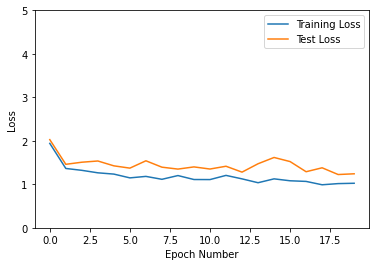

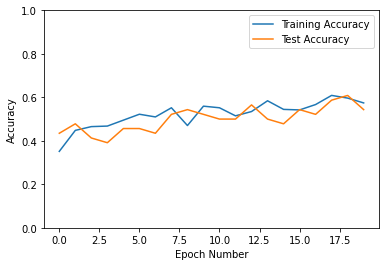

In [ ]:
trained_model, history = train_and_test(train_loader, test_loader, CNN_7_4, model_name, loss_func, optimizer, device, num_epochs)
history_save(history, model_name)

history = np.array(history)
result_figure_save(history, model_name)

### 7.5 Single-block CNN (Resnet+Senet)
考虑特征的不同通道之间的关系，对于特征图而言，大量的通道中，可能有的通道的特征图有用，而有的无效，SE的想法就是通过学习的方式获取每个特征通道的重要程度，然后依照这个重要程度提升有用的特征，抑制无效的特征。这种压缩在膨胀的过程可以看做是不同层特征图数据交融，原本进行1X1的卷积就可以加强非线性和跨通道的信息交互。

In [ ]:
class SeBlock(nn.Module):
    def __init__(self, in_channels, output_channels, stride=1, is_1x1conv=False):
        super(SeBlock, self).__init__()
        self.is_1x1conv = is_1x1conv
        self.relu = nn.ReLU(inplace=True)

        # -----------------------------------------
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, output_channels, kernel_size=1, stride=stride, bias=False),
            nn.BatchNorm2d(output_channels),
            nn.ReLU()
        )
        # -----------------------------------------
        if is_1x1conv:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, output_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(output_channels)
            )
        self.se = nn.Sequential(
            nn.AdaptiveAvgPool2d((1,1)),
            nn.Conv2d(output_channels, output_channels//16, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(output_channels//16, output_channels, kernel_size=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x_shortcut = x
        x = self.conv(x)
        seResult = self.se(x)
        x = seResult*x
        if self.is_1x1conv:
            x_shortcut = self.shortcut(x_shortcut)
        x = x + x_shortcut
        output = self.relu(x)
        return output

In [ ]:
model_name = 'CNN/7_5'

CNN_7_5 = nn.Sequential(
    nn.Conv2d(3,hidden_size,kernel_size=7,stride=2,padding=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2,padding=1),
    SeBlock(128, 128, stride=1, is_1x1conv=True),
    nn.MaxPool2d(kernel_size=3,stride=2,padding=1),
    GlobalAvgPool2d(),
    nn.Flatten(),
    nn.Linear(128, classes_num),
)
CNN_7_5 = CNN_7_5.to(device)

weight_initialization(CNN_7_5)

optimizer = optim.Adam(CNN_7_5.parameters())

# summary(CNN_7_5, (3, crop_size, crop_size))
display_num_param(CNN_7_5)

There are 55053 (0.06 million) parameters in this neural network


We create new directory ./Models/CNN/7_5
Epoch: 1/20
Epoch: 001, Training: Loss: 1.6627, Accuracy: 32.6733%, 
		Test: Loss: 1.6719, Accuracy: 34.7826%, 
		Time: 5.3541s
Best Accuracy for test : 34.7826% at epoch 001, best loss: 1.6719

Epoch: 2/20
Epoch: 002, Training: Loss: 1.3365, Accuracy: 44.3069%, 
		Test: Loss: 1.5366, Accuracy: 36.9565%, 
		Time: 5.3436s
Best Accuracy for test : 36.9565% at epoch 002, best loss: 1.5366

Epoch: 3/20
Epoch: 003, Training: Loss: 1.2742, Accuracy: 48.2673%, 
		Test: Loss: 1.4088, Accuracy: 50.0000%, 
		Time: 5.2893s
Best Accuracy for test : 50.0000% at epoch 003, best loss: 1.4088

Epoch: 4/20
Epoch: 004, Training: Loss: 1.2383, Accuracy: 47.0297%, 
		Test: Loss: 1.3091, Accuracy: 52.1739%, 
		Time: 5.3243s
Best Accuracy for test : 52.1739% at epoch 004, best loss: 1.3091

Epoch: 5/20
Counter 1 of 5 for determining early stopping
Epoch: 005, Training: Loss: 1.2326, Accuracy: 46.5347%, 
		Test: Loss: 1.3512, Accuracy: 50.0000%, 
		Time: 5.2905s
Best 

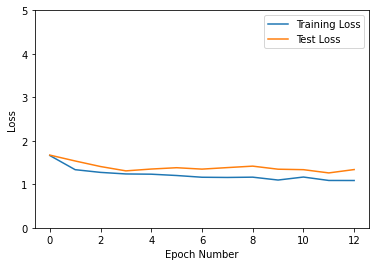

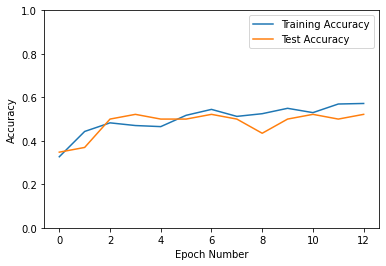

In [ ]:
trained_model, history = train_and_test(train_loader, test_loader, CNN_7_5, model_name, loss_func, optimizer, device, num_epochs)
history_save(history, model_name)

history = np.array(history)
result_figure_save(history, model_name)

### 7.6 Multi-block CNN (Bottle Neck+Inception+Resnet+Senet)

In [ ]:
class Inception_BottleNeck_Resnet_SenetModel(nn.Module):
    def __init__(self, is_1x1conv=False):
        super(Inception_BottleNeck_Resnet_SenetModel,self).__init__()
        self.is_1x1conv = is_1x1conv
        # -----------------------------------------
        self.b1 = nn.Sequential(
            nn.Conv2d(3,64,kernel_size=7,stride=2,padding=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3,stride=2,padding=1)
        )
        # -----------------------------------------
        self.b2 = nn.Sequential(
            nn.Conv2d(64,64,kernel_size=1),
            nn.Conv2d(64,128,kernel_size=3,padding=1)
        )
        # -----------------------------------------
        self.se1 = SeBlock(128, 128, stride=1, is_1x1conv=self.is_1x1conv)
        # if is_1x1conv:
        #     self.shortcut = nn.Sequential(
        #         nn.Conv2d(64, 64, kernel_size=1, stride=1, bias=False),
        #         nn.BatchNorm2d(64)
        #     )
        # self.se = nn.Sequential(
        #     nn.AdaptiveAvgPool2d((1,1)),
        #     nn.Conv2d(64, 64//16, kernel_size=1),
        #     nn.ReLU(),
        #     nn.Conv2d(64//16, 64, kernel_size=1),
        #     nn.Sigmoid()
        # )
        # -----------------------------------------
        self.b3 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3,stride=2,padding=1)
        )
        # -----------------------------------------
        self.se2 = nn.Sequential(
            SeBlock(128, 128, stride=1, is_1x1conv=self.is_1x1conv),
            nn.MaxPool2d(kernel_size=3,stride=2,padding=1),
            nn.Dropout(0.1)
        )
        # -----------------------------------------
        self.b4 = nn.Sequential(
            Bottleneck_Inception(Inception(256,128,(96,128),(16,32),32), 256, 256, 320, 416),
            nn.MaxPool2d(kernel_size=3,stride=2,padding=1)
        )
        # -----------------------------------------
        self.b5 = nn.Sequential(
            Bottleneck_Inception(Inception(416,192,(96,208),(16,48),64), 416, 416, 512, 832),
            GlobalAvgPool2d()
        )
        # -----------------------------------------
        # self.feature = nn.Sequential(
        #     self.b1,self.b2,self.b3,self.b4,self.b5,self.b6
        # )
        # -----------------------------------------
        self.fc = nn.Sequential(
            nn.Linear(832, classes_num)
        )
        # -----------------------------------------

    def forward(self, x):
        x = self.b1(x)
        # print(x.shape)
        x_shortcut = x
        x = self.b2(x)
        se1_result = self.se1(x)
        # print(se1_result.shape)
        # seResult = self.se(x)
        # x = seResult*x
        # if self.is_1x1conv:
        #     x_shortcut = self.shortcut(x_shortcut)
        # x = x + x_shortcut
        # print(x.shape)
        x = self.b3(se1_result)
        # print(x.shape)
        x = self.se2(x)
        # print(x.shape)
        # print(torch.concat((x, x, x, x), dim=-2).shape)
        # print(torch.concat((x, x, x, x), dim=-1).shape)
        
        x = torch.concat((x,)*int(se1_result.shape[-2]/x.shape[-2]), dim=-2)
        x = torch.concat((x,)*int(se1_result.shape[-1]/x.shape[-1]), dim=-1)
        x = torch.concat((x, se1_result), dim=1)
        # print(x.shape)
        x = self.b4(x)
        # print(x.shape)
        x = self.b5(x)
        # print(x.shape)
        x = x.view(x.size(0),-1)
        x = self.fc(x)
        return x

In [ ]:
model_name = 'CNN/7_6'

CNN_7_6 = Inception_BottleNeck_Resnet_SenetModel(is_1x1conv=True)
CNN_7_6 = CNN_7_6.to(device)

weight_initialization(CNN_7_6)

optimizer = optim.Adam(CNN_7_6.parameters())

# summary(CNN_7_6, (3, crop_size, crop_size))
display_num_param(CNN_7_6)

There are 1513781 (1.51 million) parameters in this neural network


We create new directory ./Models/CNN/7_6
Epoch: 1/20
Epoch: 001, Training: Loss: 1.5455, Accuracy: 37.3762%, 
		Test: Loss: 1.7005, Accuracy: 39.1304%, 
		Time: 6.4454s
Best Accuracy for test : 39.1304% at epoch 001, best loss: 1.7005

Epoch: 2/20
Counter 1 of 5 for determining early stopping
Epoch: 002, Training: Loss: 1.4067, Accuracy: 42.3267%, 
		Test: Loss: 1.9157, Accuracy: 39.1304%, 
		Time: 6.3940s
Best Accuracy for test : 39.1304% at epoch 001, best loss: 1.7005

Epoch: 3/20
Epoch: 003, Training: Loss: 1.3392, Accuracy: 41.8317%, 
		Test: Loss: 1.4546, Accuracy: 45.6522%, 
		Time: 6.4283s
Best Accuracy for test : 45.6522% at epoch 003, best loss: 1.4546

Epoch: 4/20
Counter 1 of 5 for determining early stopping
Epoch: 004, Training: Loss: 1.2542, Accuracy: 49.2574%, 
		Test: Loss: 2.2831, Accuracy: 34.7826%, 
		Time: 6.4370s
Best Accuracy for test : 45.6522% at epoch 003, best loss: 1.4546

Epoch: 5/20
Epoch: 005, Training: Loss: 1.2547, Accuracy: 47.0297%, 
		Test: Loss: 1.27

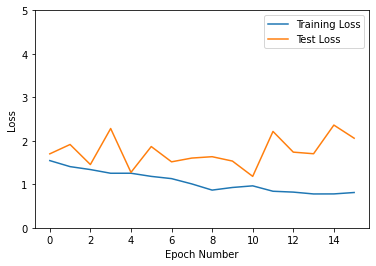

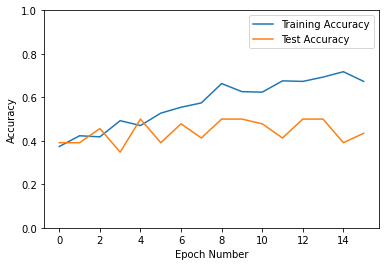

In [ ]:
trained_model, history = train_and_test(train_loader, test_loader, CNN_7_6, model_name, loss_func, optimizer, device, num_epochs)
history_save(history, model_name)

history = np.array(history)
result_figure_save(history, model_name)

### 7.7 Multi-block CNN (Resnet18)
* https://arxiv.org/pdf/1611.05431.pdf

In [ ]:
from torchvision.models import ResNet18_Weights
model_name = 'CNN/resnet18'

# resnet18 = models.resnet18()
resnet18 = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
# resnet18 = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_se_resnext101_32x4d')

for param in resnet18.parameters():
    param.requires_grad = False
fc_inputs = resnet18.fc.in_features
resnet18.fc = nn.Linear(fc_inputs, classes_num)
resnet18 = resnet18.to(device)

# weight_initialization(resnet18)

optimizer = optim.Adam(resnet18.parameters())

# summary(resnet18, (3, crop_size, crop_size))
display_num_param(resnet18)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

There are 11179077 (11.18 million) parameters in this neural network


We create new directory ./Models/CNN/resnet18
Epoch: 1/20
Epoch: 001, Training: Loss: 1.4714, Accuracy: 39.8515%, 
		Test: Loss: 1.2793, Accuracy: 47.8261%, 
		Time: 5.4818s
Best Accuracy for test : 47.8261% at epoch 001, best loss: 1.2793

Epoch: 2/20
Epoch: 002, Training: Loss: 1.1009, Accuracy: 59.9010%, 
		Test: Loss: 0.9454, Accuracy: 63.0435%, 
		Time: 5.4647s
Best Accuracy for test : 63.0435% at epoch 002, best loss: 0.9454

Epoch: 3/20
Epoch: 003, Training: Loss: 0.8934, Accuracy: 67.5743%, 
		Test: Loss: 0.8152, Accuracy: 69.5652%, 
		Time: 5.4874s
Best Accuracy for test : 69.5652% at epoch 003, best loss: 0.8152

Epoch: 4/20
Epoch: 004, Training: Loss: 0.7980, Accuracy: 70.7921%, 
		Test: Loss: 0.7405, Accuracy: 73.9130%, 
		Time: 5.3812s
Best Accuracy for test : 73.9130% at epoch 004, best loss: 0.7405

Epoch: 5/20
Epoch: 005, Training: Loss: 0.7324, Accuracy: 73.7624%, 
		Test: Loss: 0.6727, Accuracy: 76.0870%, 
		Time: 5.4274s
Best Accuracy for test : 76.0870% at epoch 005

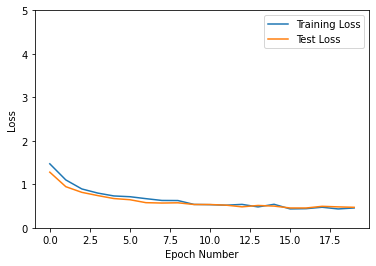

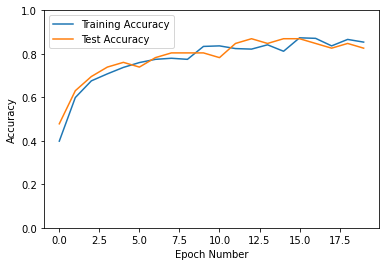

In [ ]:
trained_model, history = train_and_test(train_loader, test_loader, resnet18, model_name, loss_func, optimizer, device, num_epochs)
history_save(history, model_name)

history = np.array(history)
result_figure_save(history, model_name)

### Summary

## Step 9: NN Interpretability (Class Activation Map)

#### The image and the heatmap that we want to show.

In [ ]:
class_file_name = list(filter(lambda x: not x.endswith("csv"), os.listdir(test_dataset_save_path)))
import random
show_dir = []
for each_one in class_file_name:
  each_file = random.sample(os.listdir(os.path.join(test_dataset_save_path, each_one)), 1)

  for item in each_file:
    show_dir.append(os.path.join(test_dataset_save_path, each_one, item))
print(show_dir)

['./Dataset/test/Recyclable_Newspaper/Newspaper_6.jpg', './Dataset/test/Recyclable_Pillow/Pillow_24.jpg', './Dataset/test/Harmful waste_Battery/Battery_10.jpg', './Dataset/test/Wet garbage_Vegetables/Vegetables_21.jpg', './Dataset/test/Dry garbage_Pen/Pen_48.jpg']


In [ ]:
# class_file_name = list(filter(lambda x: not x.endswith("csv"), os.listdir("./Image_crawler/Flickr_scrape")))
# import random
# show_dir = []
# for each_one in class_file_name:
#   each_file = random.sample(os.listdir(os.path.join('./Image_crawler/Flickr_scrape', each_one)), 1)

#   for item in each_file:
#     show_dir.append(os.path.join('./Image_crawler/Flickr_scrape', each_one, item))
# print(show_dir)

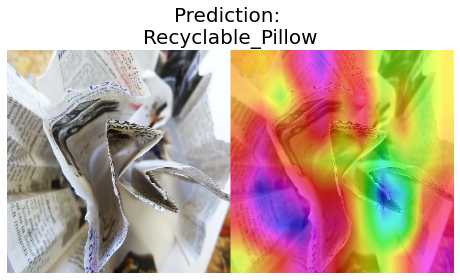

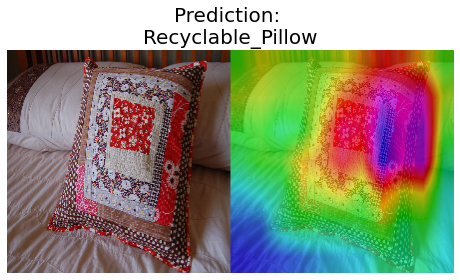

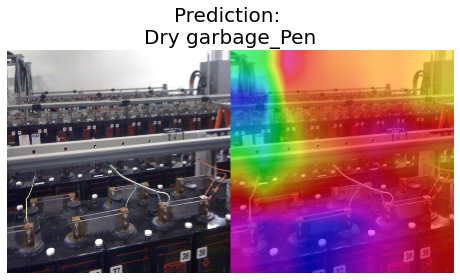

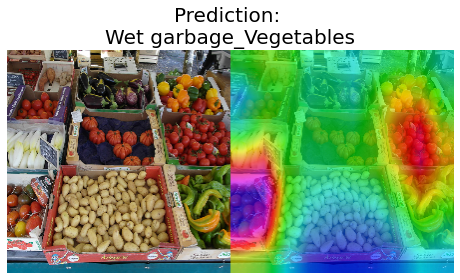

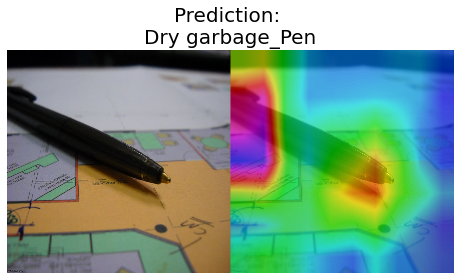

In [ ]:
import numpy as np
from torchvision import models, transforms
import cv2
from PIL import Image
from torch.nn import functional as F

resnet18.eval()

global feature_data
feature_data = []

def feature_hook(model, input, output):
    feature_data.append(output.cpu().data.numpy())

resnet18._modules.get('layer4').register_forward_hook(feature_hook)
fc_weights_resnet18 = resnet18._modules.get('fc').weight.cpu().data.numpy()

image_transform = transforms.Compose([
        transforms.Resize(size=224),
        transforms.ToTensor(),
        transforms.Normalize(mean_RGB.tolist(), std_RGB.tolist())
                             
])




def makeCAM(feature, weights, classes_id):
    # print(feature.shape, weights.shape, classes_id)

    bz, nc, h, w = feature.shape
    cam = weights[classes_id].dot(feature.reshape(nc, h * w))
    cam = cam.reshape(h, w) 
    cam = (cam - cam.min()) / (cam.max() - cam.min())
    cam_gray = np.uint8(255 * cam)
    return cv2.resize(cam_gray, (224, 224))


def heat_map_cam(show_dir):
  images_so_far = 0
  for path_name_show in show_dir:
    image = image_transform(Image.open(path_name_show)).unsqueeze(0).to(device)
    out_resnet18 = resnet18(image)
    predict_classes_id_resnet18 = np.argmax(F.softmax(out_resnet18, dim=1).cpu().data.numpy())

    cam_gray_resnet18 = makeCAM(feature_data[0], fc_weights_resnet18, predict_classes_id_resnet18)

    src_image = cv2.resize(cv2.imread(path_name_show), (224, 224))[:, :, ::-1]
    h, w, _ = src_image.shape

    cam_color_resnet18 = cv2.applyColorMap(cv2.resize(cam_gray_resnet18, (w, h)),
                                          cv2.COLORMAP_HSV)

    cam_resnet18 = src_image * 0.4 + cam_color_resnet18 * 0.6

    cam_hstack = np.hstack((src_image, cam_resnet18))


    for class_name, class_index in classes.items():
        if class_index == predict_classes_id_resnet18:
            title_name = class_name
            break

    fig = plt.figure(figsize=(8, 8))
    plt.title('Prediction: \n{}'.format(title_name), fontsize=20)
    plt.imshow(cam_hstack / 255.)
    plt.axis('off')
    feature_data.clear()

heat_map_cam(show_dir)

## Step 10: Front-end layer

In [ ]:
model = copy.deepcopy(resnet18).to(device)

### 10.1 t-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
def tsne_plot(X, y, perplexity=None, palette=None):
    labels = y['label'].values
    if not palette:
       palette = sns.color_palette("bright", np.unique(labels).size)
    if not perplexity:
        tsne = TSNE()
    else:
        tsne = TSNE(perplexity=perplexity)
    X_embedded = tsne.fit_transform(X)
    sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=labels, legend='full', palette=palette)
    return X_embedded, palette

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


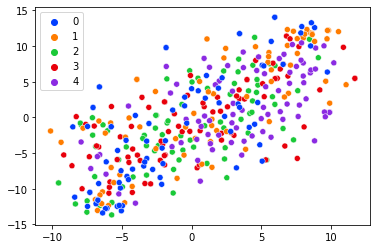

In [ ]:
X_train_TSNE, y_train_TSNE, label_encoder_train = images_df(train_dataset_save_path)
X_embedded_train, _ = tsne_plot(X_train_TSNE, y_train_TSNE)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


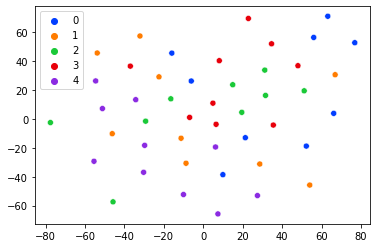

In [ ]:
X_test_TSNE, y_test_TSNE, _ = images_df(test_dataset_save_path)
X_embedded_test, _ = tsne_plot(X_test_TSNE, y_test_TSNE)

### 10.2 Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

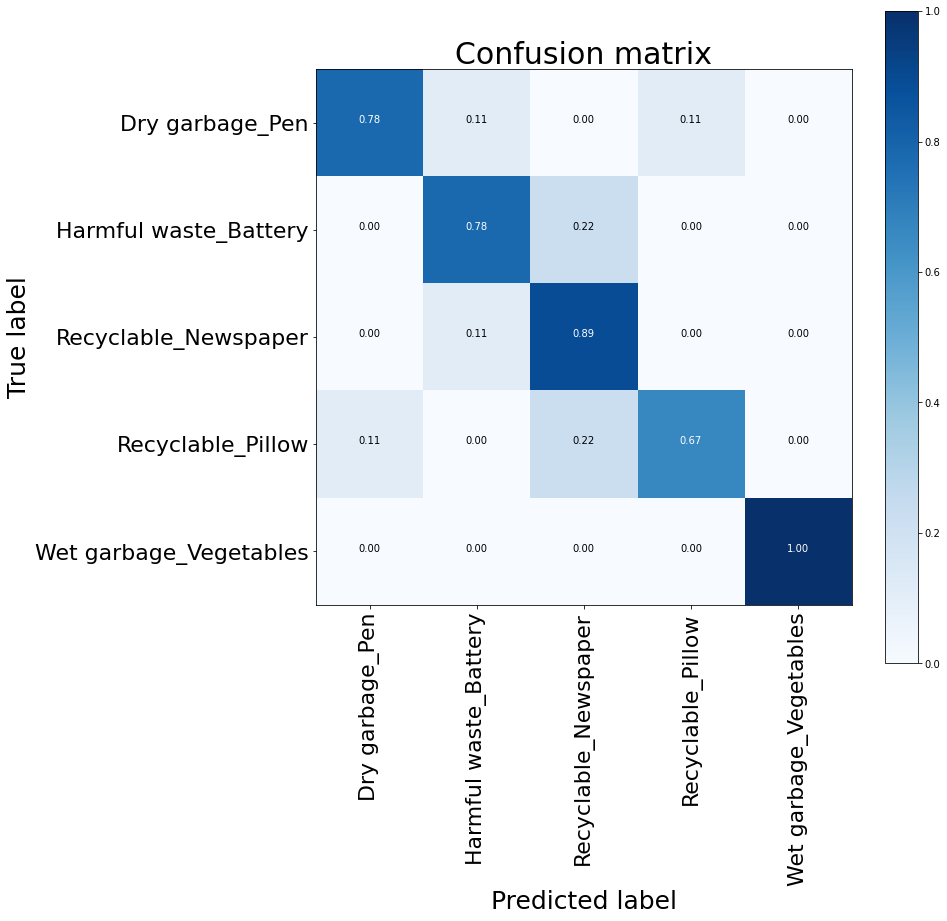

CPU times: user 886 ms, sys: 24.3 ms, total: 910 ms
Wall time: 951 ms


In [ ]:
%%time

truth_labels = []
predict_labels = []

with torch.no_grad():
    model.eval()

    for i, (inputs, labels) in enumerate(test_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = np.argmax(F.softmax(model(inputs), dim=1).cpu().data.numpy(), axis=1)
        truth_labels.extend(labels.cpu().detach().numpy().reshape(-1))
        predict_labels.extend(outputs.reshape(-1))

cnf_matrix = confusion_matrix(truth_labels, predict_labels)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=classes, title="Confusion matrix")
plt.show()

### 10.3 Visualize by bokeh

In [ ]:
from plot_text import header, description, description2, cite, description_search, description_slider, notes, dataset_description, toolbox_header, description_current, description_keyword, tasks_for_each_member
from call_backs import input_callback, selected_code
import bokeh
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper, CustomJS, Slider, TapTool, TextInput
from bokeh.palettes import Category20
from bokeh.transform import linear_cmap, transform
from bokeh.io import output_file, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import RadioButtonGroup, TextInput, Div, Paragraph
from bokeh.layouts import column, widgetbox, row, layout
from bokeh.layouts import column

#### Initial Setup

In [ ]:
# show on notebook
output_notebook()
# target labels
truth_indexes = []
predict_indexes = []
X_TSNE = []

with torch.no_grad():
    model.eval()

    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = np.argmax(F.softmax(model(inputs), dim=1).cpu().data.numpy(), axis=1)
        truth_indexes.extend(labels.cpu().detach().numpy().reshape(-1))
        predict_indexes.extend(outputs.reshape(-1))
        X_TSNE.extend(inputs.cpu().detach().numpy().reshape(inputs.shape[0],-1))
    
    for i, (inputs, labels) in enumerate(test_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = np.argmax(F.softmax(model(inputs), dim=1).cpu().data.numpy(), axis=1)
        truth_indexes.extend(labels.cpu().detach().numpy().reshape(-1))
        predict_indexes.extend(outputs.reshape(-1))
        X_TSNE.extend(inputs.cpu().detach().numpy().reshape(inputs.shape[0],-1))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


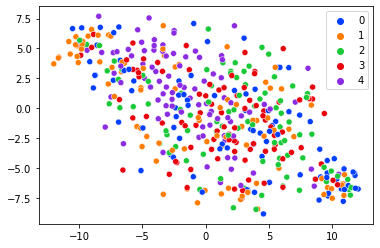

In [ ]:
X_TSNE_df = pd.DataFrame(X_TSNE)
X_TSNE_df = X_TSNE_df.add_prefix('X')
truth_indexes_df = pd.DataFrame(truth_indexes, columns=['label'])
X_embedded, _ = tsne_plot(X_TSNE, truth_indexes_df)

In [ ]:
classes_encoded = {index:label for label, index in classes.items()}
label_transformer = lambda x: classes_encoded.get(x, 'None')
label_transformer = np.vectorize(label_transformer)
truth_labels = label_transformer(truth_indexes)
predict_labels = label_transformer(predict_indexes)

In [ ]:
keywords = {index:set() for index in classes.values()}
for truth_index, predict_label in zip(truth_indexes, predict_labels):
    keywords[truth_index].add(predict_label)
keywords = {index:", ".join(keyword) for index, keyword in keywords.items()}
print(keywords)

{0: 'Recyclable_Newspaper,Harmful waste_Battery,Recyclable_Pillow,Dry garbage_Pen', 1: 'Recyclable_Newspaper,Harmful waste_Battery,Recyclable_Pillow', 2: 'Recyclable_Newspaper,Harmful waste_Battery,Recyclable_Pillow', 3: 'Recyclable_Newspaper,Harmful waste_Battery,Recyclable_Pillow,Dry garbage_Pen', 4: 'Wet garbage_Vegetables'}


In [ ]:
classes_encoded = {index:label for label, index in classes.items()}
label_transformer = lambda x: classes_encoded.get(x, 'None')
label_transformer = np.vectorize(label_transformer)
truth_labels = label_transformer(truth_indexes)
predict_labels = label_transformer(predict_indexes)

# data sources
source = ColumnDataSource(data=dict(
    x = X_embedded[:,0],
    y = X_embedded[:,1],
    x_backup = X_embedded[:,0],
    y_backup = X_embedded[:,1],
    indexes = truth_indexes, 
    truths = truth_labels,
    predictions = predict_labels,
    labels = truth_labels
    ))

# hover over information
hover = HoverTool(tooltips=[
    ("Truth", "@truths{safe}"),
    ("Prediction", "@predictions{safe}"),
],
point_policy="follow_mouse")

# map colors
mapper = linear_cmap(field_name='indexes', 
                     palette=Category20[5],
                     low=min(truth_indexes) ,high=max(truth_indexes))

# prepare the figure
plot = figure(plot_width=1200, plot_height=850, 
           tools=[hover, 'pan', 'wheel_zoom', 'box_zoom', 'reset', 'save', 'tap'], 
           title="Garbage classification (Shanghai) with t-SNE and Deep Learning", 
           toolbar_location="above")

# plot settings
plot.scatter('x', 'y', size=10, 
          source=source,
          fill_color=mapper,
          line_alpha=0.3,
          line_color="black",
          legend_group='labels')
plot.legend.background_fill_alpha = 0.6

#### Widgets

In [ ]:
# Keywords
text_banner = Paragraph(text= 'Keywords: Slide to specific class to see the keywords.', height=25)
input_callback_instance = input_callback(plot, source, text_banner, keywords, classes_num)

# currently selected image
div_curr = Div(text="""Click on a plot to see the link to the image.""",height=150)
callback_selected = CustomJS(args=dict(source=source, current_selection=div_curr), code=selected_code())
taptool = plot.select(type=TapTool)
taptool.callback = callback_selected

# WIDGETS
slider = Slider(start=0, end=len(classes), value=len(classes), step=1, title="Classes #")
slider.js_on_change('value', input_callback_instance)
keyword = TextInput(title="Search:")
keyword.js_on_change('value', input_callback_instance)

#RangesUpdate

# pass call back arguments
input_callback_instance.args["text"] = keyword
input_callback_instance.args["slider"] = slider
# column(,,widgetbox(keyword),,widgetbox(slider),, notes, cite, cite2, cite3), plot

#### Style

In [ ]:
# STYLE
header.sizing_mode = "stretch_width"
header.style={'color': '#2e484c', 'font-family': 'Julius Sans One, sans-serif;'}
header.margin=5

description.style ={'font-family': 'Helvetica Neue, Helvetica, Arial, sans-serif;', 'font-size': '1.1em'}
description.sizing_mode = "stretch_width"
description.margin = 5

description2.sizing_mode = "stretch_width"
description2.style ={'font-family': 'Helvetica Neue, Helvetica, Arial, sans-serif;', 'font-size': '1.1em'}
description2.margin=10

description_slider.style ={'font-family': 'Helvetica Neue, Helvetica, Arial, sans-serif;', 'font-size': '1.1em'}
description_slider.sizing_mode = "stretch_width"

description_search.style ={'font-family': 'Helvetica Neue, Helvetica, Arial, sans-serif;', 'font-size': '1.1em'}
description_search.sizing_mode = "stretch_width"
description_search.margin = 5

slider.sizing_mode = "stretch_width"
slider.margin=15

keyword.sizing_mode = "scale_both"
keyword.margin=15

div_curr.style={'color': '#BF0A30', 'font-family': 'Helvetica Neue, Helvetica, Arial, sans-serif;', 'font-size': '1.1em'}
div_curr.sizing_mode = "scale_both"
div_curr.margin = 20

text_banner.style={'color': '#0269A4', 'font-family': 'Helvetica Neue, Helvetica, Arial, sans-serif;', 'font-size': '1.1em'}
text_banner.sizing_mode = "stretch_width"
text_banner.margin = 20

plot.sizing_mode = "scale_both"
plot.margin = 5

dataset_description.sizing_mode = "stretch_width"
dataset_description.style ={'font-family': 'Helvetica Neue, Helvetica, Arial, sans-serif;', 'font-size': '1.1em'}
dataset_description.margin=10

notes.sizing_mode = "stretch_width"
notes.style ={'font-family': 'Helvetica Neue, Helvetica, Arial, sans-serif;', 'font-size': '1.1em'}
notes.margin=10

cite.sizing_mode = "stretch_width"
cite.style ={'font-family': 'Helvetica Neue, Helvetica, Arial, sans-serif;', 'font-size': '1.1em'}
cite.margin=10

tasks_for_each_member.sizing_mode = "stretch_width"
tasks_for_each_member.style ={'font-family': 'Helvetica Neue, Helvetica, Arial, sans-serif;', 'font-size': '1.1em'}
tasks_for_each_member.margin=10

r = row(div_curr,text_banner)
r.sizing_mode = "stretch_width"

#### Show

In [ ]:
# LAYOUT OF THE PAGE
l = layout([
    [header],
    [description],
    [description_slider, description_search],
    [slider, keyword],
    [text_banner],
    [div_curr],
    [plot],
    [description2, dataset_description, tasks_for_each_member, notes],
])
l.sizing_mode = "scale_both"


# show
output_file('./garbage_classification_plot_interactive.html')
show(l)

### 10.4 Visualize by Gradio

In [ ]:
!pip3 install gradio
import gradio as gr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 13.7 MB/s 
     |████████████████████████████████| 84 kB 4.1 MB/s 
     |████████████████████████████████| 54 kB 3.9 MB/s 
     |████████████████████████████████| 56 kB 5.8 MB/s 
     |████████████████████████████████| 84 kB 3.9 MB/s 
     |████████████████████████████████| 272 kB 63.8 MB/s 
     |████████████████████████████████| 212 kB 73.6 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 106 kB 69.5 MB/s 
     |████████████████████████████████| 2.3 MB 49.7 MB/s 
     |████████████████████████████████| 63 kB 2.6 MB/s 
     |████████████████████████████████| 80 kB 10.2 MB/s 
     |████████████████████████████████| 68 kB 8.5 MB/s 
     |████████████████████████████████| 46 kB 5.0 MB/s 
     |████████████████████████████████| 4.0 MB 54.5 MB/s 
     |████████████████████████████████| 856 kB 5

In [ ]:
def predict_image_upload(inputs):
    inputs = Image.fromarray(inputs.astype('uint8'), 'RGB')
    inputs = image_transforms['test'](inputs).unsqueeze(0).to(device) # 3D -> 4D (add batch_size=1)
    # with torch.no_grad():
    #     outputs = model(inputs)[0]
    #     print(outputs)
    model.eval()
    with torch.no_grad():
        outputs = torch.nn.functional.softmax(model(inputs)[0], dim=0)
        # print(outputs)
    return {class_name: float(outputs[class_index]) for class_name, class_index in classes.items()}

inputs = gr.inputs.Image()
outputs = gr.outputs.Label(num_top_classes=5)
gr.Interface(fn=predict_image_upload, inputs=inputs, outputs=outputs).launch(debug=True)

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://be38fc739f30956d.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7fefff0d0950>,
 'http://127.0.0.1:7860/',
 'https://be38fc739f30956d.gradio.app')

In [ ]:
def predict_written(inputs):
    inputs = torch.tensor(inputs, dtype=torch.float32).unsqueeze(0) / 255
    inputs = Image.fromarray(inputs.numpy(), 'RGB')
    inputs = image_transforms['test'](inputs).unsqueeze(0).to(device) # 3D -> 4D (add batch_size=1)
    # with torch.no_grad():
    #     outputs = model(inputs)[0]
    #     print(outputs)
    model.eval()
    with torch.no_grad():
        outputs = torch.nn.functional.softmax(model(inputs)[0], dim=0)
        # print(outputs)
    return {class_name: float(outputs[class_index]) for class_name, class_index in classes.items()}

# inputs = gr.inputs.Sketchpad(shape=(8, 8), flatten=False, scale=1/255, invert_colors=False)
outputs = gr.outputs.Label(num_top_classes=5)
gr.Interface(fn=predict_written, inputs="sketchpad", outputs=outputs).launch(debug=True)

/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://e21154ef6ae8d645.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


KeyboardInterrupt: ignored

In [ ]:
# io.launch(inbrowser=True, inline=False, validate=False, share=True, debug=True)
# inbrowser - 模型是否应在新的浏览器窗口中启动。
# inline - 模型是否应该嵌入在交互式python环境中（如jupyter notebooks或colab notebooks）。
# validate - gradio是否应该在启动之前尝试验证接口模型兼容性。
# share - 是否应创建共享模型的公共链接。用于处理。
# debug - 在notebook中debug, show error message